In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import optimize
import umodel as unf

import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [2]:
def plotResult(xEdges, postFitPOIs1, postFitPOIs2):
    
    '''
    This function plot the post-fit unfolded bins 
    versus the unfolded observables values.
    
    xEdges: 1D array with edges of observable values
    postFitPOIs: 2D array of shape (N, 3) with N POI measurment
                 with central value, negative and positive error.
    '''
    
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2
    
    # Labels
    xlabels = ['cos($\\theta^{+}_{n}$)', 'cos($\\theta^{-}_{n}$)']
    
    for i, (distri1, distri2) in enumerate(zip(postFitPOIs1, postFitPOIs2)):
    
        # y-data
        vals1 = distri1[:, 0]
        errn1 = distri1[:, 1]
        errp1 = distri1[:, 2]
        vals2 = distri2[:, 0]
        errn2 = distri2[:, 1]
        errp2 = distri2[:, 2]

        # Plot figure
        plt.subplot(1, 2, i+1)
        
        # Plot data
        plt.plot(xCenter-0.05, vals1, 'o', markersize=10)
        plt.vlines(x=xCenter-0.05, ymin=vals1-errn1, ymax=vals1+errp1, color='tab:blue', label='w/o corr')
        plt.plot(xCenter+0.05, vals2, 'o', markersize=10, color='tab:red')
        plt.vlines(x=xCenter+0.05, ymin=vals2-errn2, ymax=vals2+errp2, color='tab:red', label='w/ corr')
        
        # Plot cosmetics
        plt.ylabel('Unfolded Yields')
        plt.xlabel(xlabels[i])
        #plt.ylim(0, 200)
        plt.legend()
    

    
def plotErrorBarRatio(xEdges, postFitPOIs1, postFitPOIs2):
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2
    
    # Labels
    xlabels = ['cos($\\theta^{+}_{n}$)', 'cos($\\theta^{-}_{n}$)']
    
    for i, (distri1, distri2) in enumerate(zip(postFitPOIs1, postFitPOIs2)):
    
        # y-data
        bar1 =  distri1[:, 2] + distri1[:, 1]
        bar2 =  distri2[:, 2] + distri2[:, 1]

        # Plot figure
        plt.subplot(1, 2, i+1)
        .00001
        # Plot data
        plt.plot(xCenter-0.05, bar2 / bar1, 'o', markersize=10)
        
        # Plot cosmetics
        plt.ylabel('Error Bar Ratio')
        plt.xlabel(xlabels[i])
        plt.ylim(0.0, 2.0)

In [3]:
# Loading data cos(n, +)
with open('../data/CosThetaNplus/asimov_spinCorrelation.json', 'r') as read_file:
    dp = np.array(json.load(read_file))
    
with open('../data/CosThetaNplus/resmat_spinCorrelation.json', 'r') as read_file:
    rp = np.array(json.load(read_file))

[[1. 0.]
 [0. 1.]]


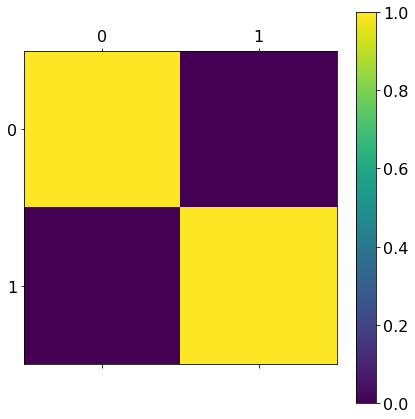

In [4]:
unity = np.diag([1]*2).astype(np.float64)
dp = np.array([100])
rp = np.array([[1]])

Ds = [dp, dp]
Rs = [rp, rp]

fullCorr = unity.copy()
for i in range(0, 1):
    for j in range(0, 1):
        if i == j:
            fullCorr[i+1, j] = 0
            fullCorr[i, j+1] = 0

plt.matshow(fullCorr)
print(fullCorr)
plt.colorbar();

mCorr = unf.model(Ds, Rs, fullCorr)
m = unf.model(Ds, Rs, corr=unity)

In [5]:
xc, _ = mCorr.unfold()
xn, _ = m.unfold()

print('Corr - Normal:')
for bc, bn in zip(xc, xn):
    print(bc-bn)
    
print('\nCorr[var1] - Corr[var2]:')
v1, v2 = xc
print(v1-v2)

Corr - Normal:
[0.]
[0.]

Corr[var1] - Corr[var2]:
[0.]


In [6]:
b3Corr = mCorr.postFitUncerPOIs(iPOI=0)
b7Corr = mCorr.postFitUncerPOIs(iPOI=1)

--> (iPOI, Min, Max, N) = (0, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (1, 3.71e+01, 1.63e+02, 10)


In [7]:
def printMeas(m):
    m = m
    print('{:.0f}  -{:.2f}  +{:.2f}'.format(m[0], m[1], m[2]))
    
printMeas(b3Corr)
printMeas(b7Corr)

97  -7.18  +7.81
97  -7.18  +7.81


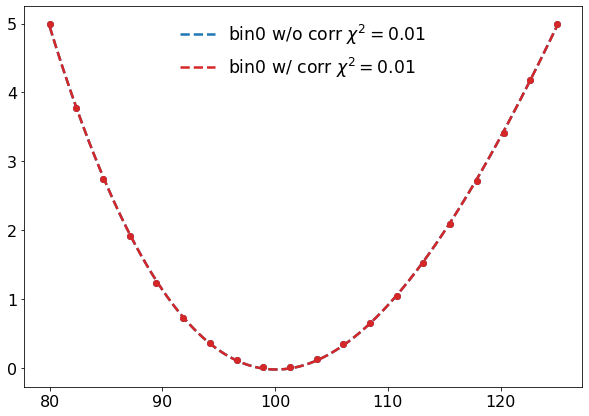

In [8]:
plt.figure()
m.plotProfile(0, 80, 125, 20, label='bin0 w/o corr', color='tab:blue')
mCorr.plotProfile(0, 80, 125, 20, label='bin0 w/ corr', color='tab:red')

## TO BE DONE

  + compare bin 0 profile for different value of the "secondary diagonal" correlation value

In [36]:
def addProfileBin(nBins, iPOI, rho, color):
    
    Ds = [np.array([100]*nBins), np.array([100]*nBins)]
    Rs = [np.eye(nBins), np.eye(nBins)]
    
    unity = np.diag([1]*2*nBins).astype(np.float64)
    fullCorr = unity.copy()
    for i in range(0, nBins):
        for j in range(0, nBins):
            if i == j:
                fullCorr[i+nBins, j] = rho
                fullCorr[i, j+nBins] = rho

    mCorr = unf.model(Ds, Rs, fullCorr)
    mCorr.plotProfile(iPOI, 80, 125, 20,
                      label='Nbins={}, bin{}'.format(nBins, iPOI) + ', $\\rho=$' + '{:.3f}'.format(rho), 
                      color=color)

In [37]:
def showRevert(nBins=2, rho=0):
    unity = np.diag([1]*2*nBins).astype(np.float64)
    fullCorr = unity.copy()
    for i in range(0, nBins):
        for j in range(0, nBins):
            if i == j:
                fullCorr[i+nBins, j] = rho
                fullCorr[i, j+nBins] = rho
    print(np.linalg.inv(fullCorr))
    
showRevert(2, 0.5)

[[ 1.33333333  0.         -0.66666667  0.        ]
 [ 0.          1.33333333  0.         -0.66666667]
 [-0.66666667  0.          1.33333333  0.        ]
 [ 0.         -0.66666667  0.          1.33333333]]


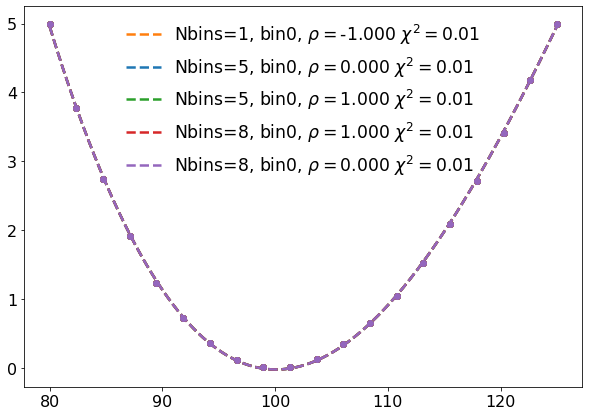

In [38]:
# Compare different correlation values
addProfileBin(nBins=1, iPOI=0, rho=-1.00, color='tab:orange')
addProfileBin(nBins=5, iPOI=0, rho= 0.00, color='tab:blue')
addProfileBin(nBins=5, iPOI=0, rho= 1.00, color='tab:green')
addProfileBin(nBins=8, iPOI=0, rho= 1.00, color='tab:red')
addProfileBin(nBins=8, iPOI=0, rho= 0.00, color='tab:purple')

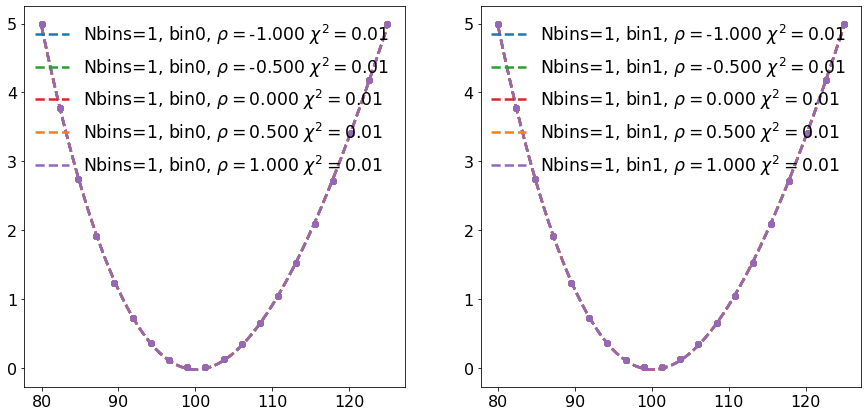

In [39]:
# Compare different correlation values
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'tab:purple'] * 10
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
for r, c in zip(np.linspace(-1, 1, 5), colors):
    addProfileBin(1, iPOI=0, rho=r, color=c)
    
plt.subplot(1, 2, 2)
for r, c in zip(np.linspace(-1, 1, 5), colors):
    addProfileBin(1, iPOI=1, rho=r, color=c)

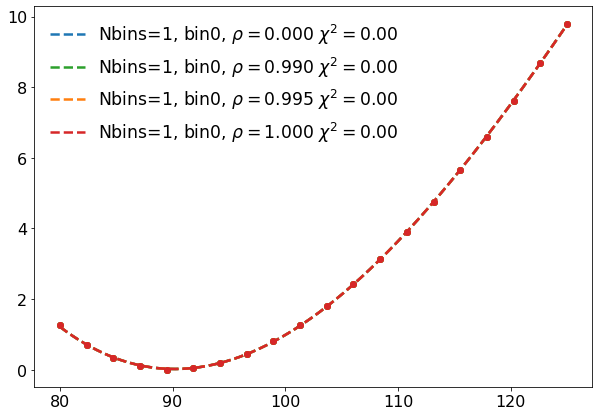

In [24]:
# Compare different correlation values
addProfileBin(1, iPOI=0, rho= 0.00, color='tab:blue')
addProfileBin(1, iPOI=0, rho= 0.99, color='tab:green')
addProfileBin(1, iPOI=0, rho= 0.995, color='tab:orange')
addProfileBin(1, iPOI=0, rho= 1.00, color='tab:red')

In [25]:
import iminuit
iminuit.minimize()

TypeError: minimize() missing 2 required positional arguments: 'fun' and 'x0'

--> (iPOI, Min, Max, N) = (0, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (1, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (0, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (1, 3.71e+01, 1.63e+02, 10)


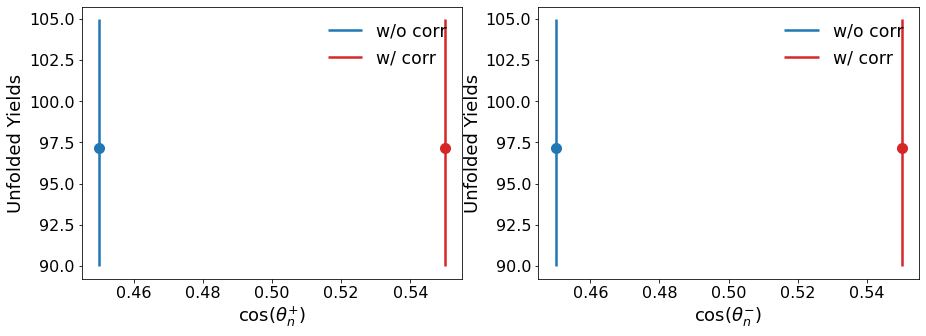

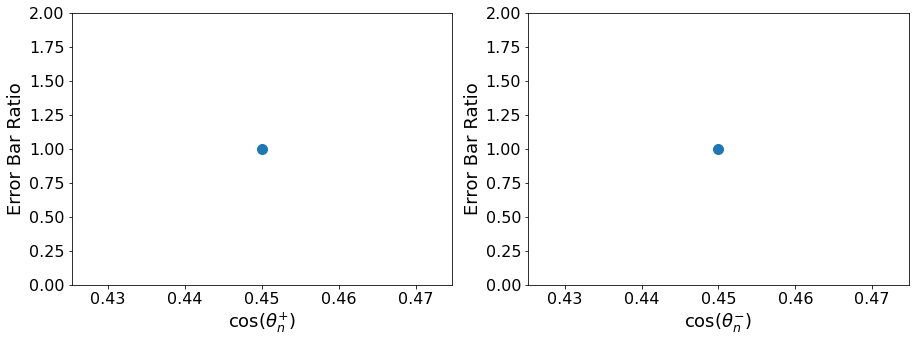

In [26]:
unity = np.diag([1]*2).astype(np.float64)
Ds = [dp, dp]
Rs = [rp, rp]

fullCorr = unity.copy()
for i in range(0, 1):
    for j in range(0, 1):
        if i == j:
            fullCorr[i+1, j] = 1.0
            fullCorr[i, j+1] = 1.0

mCorr = unf.model(Ds, Rs, fullCorr)
m = unf.model(Ds, Rs, corr=unity)

POIsCorr = mCorr.postFitUncerPOIs()
POIs = m.postFitUncerPOIs()

Xs = np.array([0, 1.0])
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)

--> (iPOI, Min, Max, N) = (0, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (1, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (0, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (1, 3.71e+01, 1.63e+02, 10)


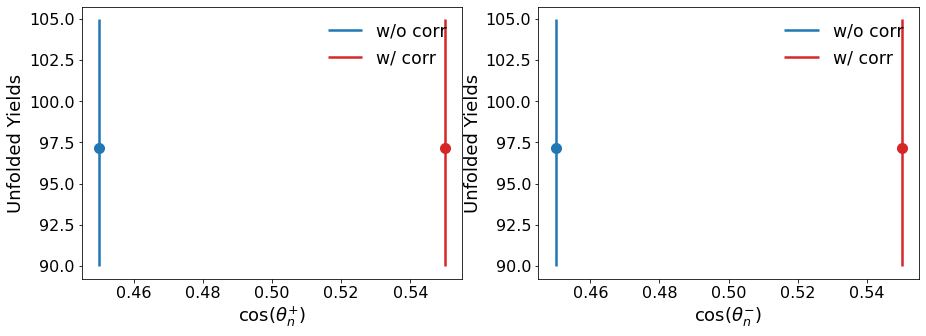

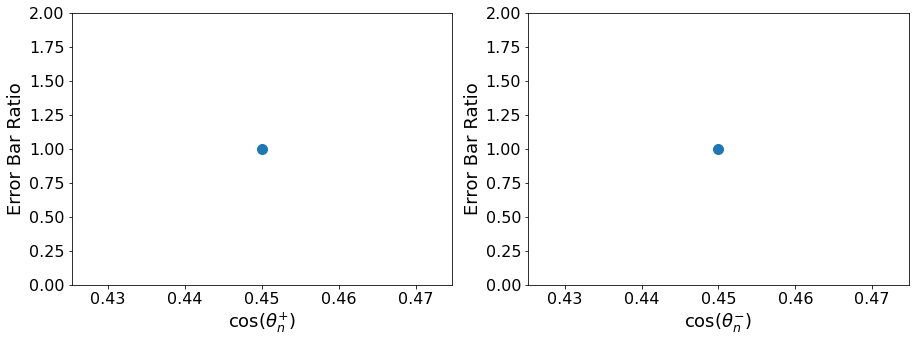

In [27]:
unity = np.diag([1]*2).astype(np.float64)
Ds = [dp, dp]
Rs = [rp, rp]

fullCorr = unity.copy()
for i in range(0, 1):
    for j in range(0, 1):
        if i == j:
            fullCorr[i+1, j] = 0.99
            fullCorr[i, j+1] = 0.99

mCorr = unf.model(Ds, Rs, fullCorr)
m = unf.model(Ds, Rs, corr=unity)

POIsCorr = mCorr.postFitUncerPOIs()
POIs = m.postFitUncerPOIs()

Xs = np.array([0.0, 1.0])
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)

--> (iPOI, Min, Max, N) = (0, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (1, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (0, 3.71e+01, 1.63e+02, 10)
--> (iPOI, Min, Max, N) = (1, 3.71e+01, 1.63e+02, 10)


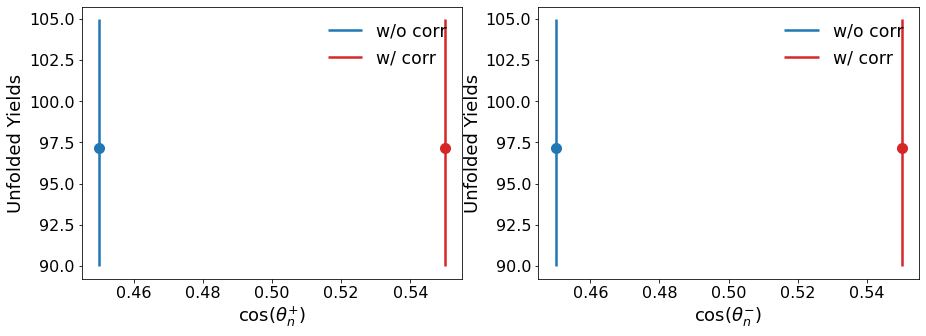

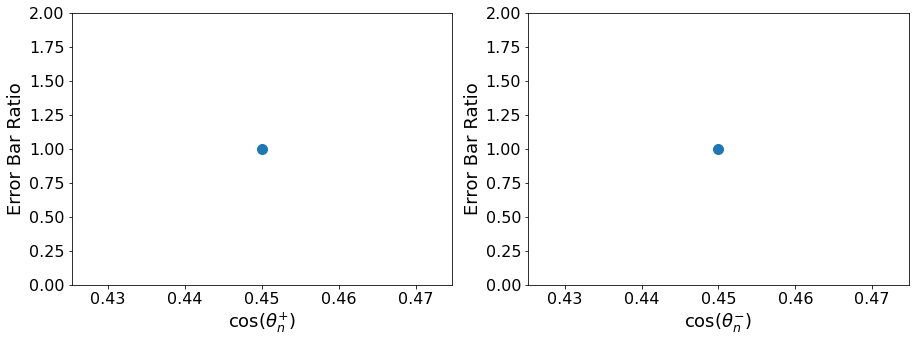

In [28]:
unity = np.diag([1]*2).astype(np.float64)
Ds = [dp, dp]
Rs = [rp, rp]

fullCorr = unity.copy()
for i in range(0, 1):
    for j in range(0, 1):
        if i == j:
            fullCorr[i+1, j] = 0.0
            fullCorr[i, j+1] = 0.0

mCorr = unf.model(Ds, Rs, fullCorr)
m = unf.model(Ds, Rs, corr=unity)

POIsCorr = mCorr.postFitUncerPOIs()
POIs = m.postFitUncerPOIs()

Xs = np.array([0.0, 1.0])
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)

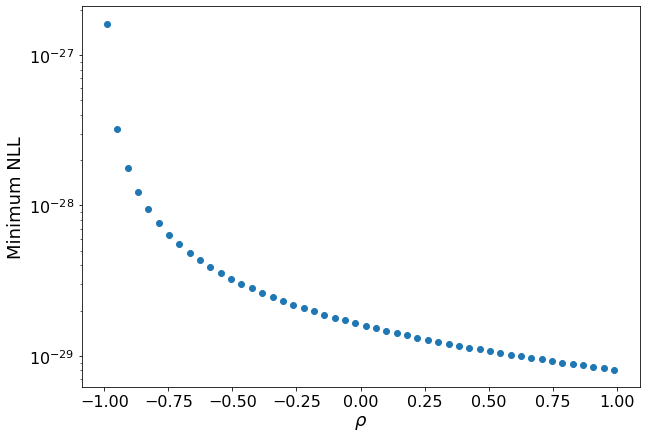

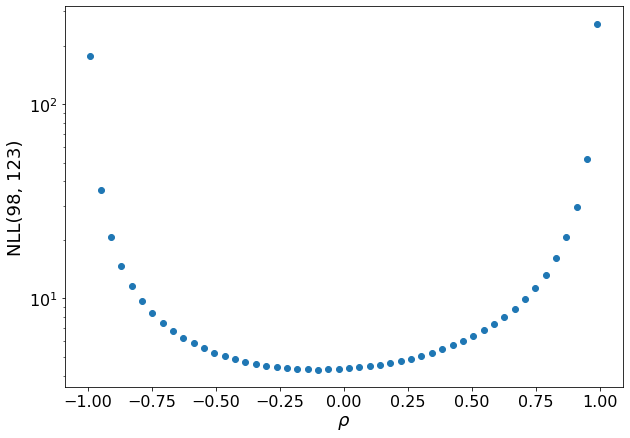

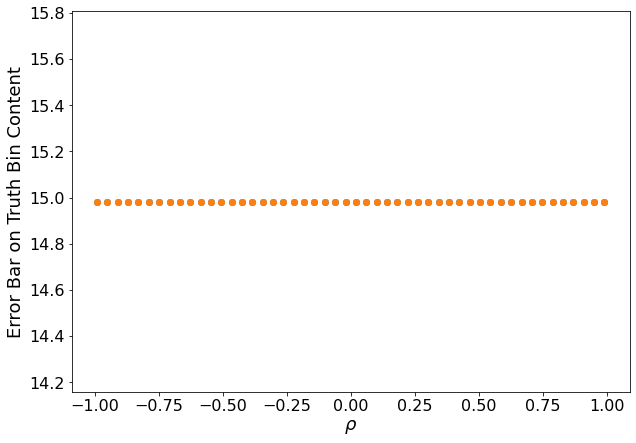

In [75]:
nBins = 1                                                                        
Ds = [np.array([100]*nBins), np.array([100]*nBins)]                              
Rs = [np.eye(nBins), np.eye(nBins)]                                              
                                                                                 
def corrMatrix(rho):                                                             
    unity = np.eye(2*nBins)                                                      
    fullCorr = unity.copy()                                                      
    for i in range(0, nBins):                                                    
        for j in range(0, nBins):                                                
            if i == j:                                                           
                fullCorr[i+nBins, j] = rho                                       
                fullCorr[i, j+nBins] = rho                                       
    return fullCorr                                                              
                                                                                                    
nll0s, nll1s = [], []
b1min, b2min = [], []
rs = np.linspace(-.99, +0.99, 50)
for r in rs:                                                 
    m = unf.model(Ds, Rs, corrMatrix(r))                                         
    _, nll = m.unfold()
    bs = m.postFitUncerPOIs(chi2Tol=5)
    b1min.append(bs[0][0][2] + bs[0][0][1])
    b2min.append(bs[1][0][2] + bs[1][0][1])
    nll0s.append(nll)
    nll1s.append(m.NLL([[98], [123]]))
    
plt.figure()
plt.semilogy(rs, nll0s, 'o')
plt.xlabel('$\\rho$')
plt.ylabel('Minimum NLL');

plt.figure()
plt.semilogy(rs, nll1s, 'o')
plt.xlabel('$\\rho$')
plt.ylabel('NLL(98, 123)');

plt.figure()
plt.plot(rs, b1min, 'o')
plt.plot(rs, b2min, 'o')
plt.xlabel('$\\rho$')
plt.ylabel('Error Bar on Truth Bin Content');

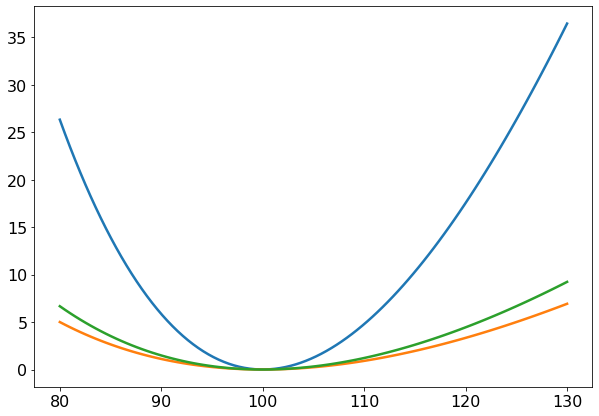

In [79]:
b1s = np.linspace(80, 130, 100)
nll1s, nll2s, nll3s = [], [], []

for b1 in b1s:
    m1 = unf.model(Ds, Rs, corrMatrix(-0.9))
    nll1s.append(m1.NLL([[b1], [100]]))
    m2 = unf.model(Ds, Rs, corrMatrix(-0.0))
    nll2s.append(m2.NLL([[b1], [100]]))
    m3 = unf.model(Ds, Rs, corrMatrix(+0.5))
    nll3s.append(m3.NLL([[b1], [100]]))
    
plt.plot(b1s, nll1s);
plt.plot(b1s, nll2s);
plt.plot(b1s, nll3s);